In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd


In [31]:
import math
import cufflinks as cf
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
data = pd.read_csv('benchmarkresult.csv')
print(data[data["tris"]=="MERGE_SORT"])
data["size"] = data["size"].apply(lambda x : math.log(x))
data["time"] = data["time"].apply(lambda x : math.log(x))
init_notebook_mode(connected = True)
cf.go_offline()
tris = set(data["tris"])
scatter = []
for t in ["RANDOM","INVERSE", "ORDERED"]:
    xTime = []
    ySize = []
    temp = data.loc[data["type"] == t]
    #temp.iplot(kind='scatter',  x="time", y="size", labels="tris", world_readable=True)
    iplot(
    {
        'data': [
            {
                'x': data[(data['type']==t) & (data['tris']==tri)]['time'],
                'y': data[(data['type']==t) & (data['tris']==tri)]['size'],
                'name': tri, 'mode': 'lines+markers',
            } for tri in tris
        ],
        'layout': {
            'title': {'text': 'Liste type : '+t},
            'xaxis': {'title': 'Temps (ms)' },
            'yaxis': {'title': "Nombre d'élément"}
        }
})
    #for tri in tris:
        #temp2 = temp.loc[temp["tris"]==tri]
        #xTime.append(np.log(temp2["time"]))
        #ySize.append(np.log(temp2["size"]))
        #plt.scatter(xTime, ySize)

        
        

           tris     type     size        time
126  MERGE_SORT   RANDOM        1    0.000084
127  MERGE_SORT   RANDOM        2    0.000380
128  MERGE_SORT   RANDOM        4    0.000678
129  MERGE_SORT   RANDOM        8    0.001442
130  MERGE_SORT   RANDOM       16    0.003239
131  MERGE_SORT   RANDOM       32    0.006488
132  MERGE_SORT   RANDOM       64    0.013091
133  MERGE_SORT   RANDOM      128    0.026782
134  MERGE_SORT   RANDOM      256    0.051487
135  MERGE_SORT   RANDOM      512    0.100516
136  MERGE_SORT   RANDOM     1024    0.203426
137  MERGE_SORT   RANDOM     2048    0.411035
138  MERGE_SORT   RANDOM     4096    0.835600
139  MERGE_SORT   RANDOM     8192    1.781340
140  MERGE_SORT   RANDOM    16384    3.419030
141  MERGE_SORT   RANDOM    32768    6.932140
142  MERGE_SORT   RANDOM    65536   14.039300
143  MERGE_SORT   RANDOM   131072   28.670900
144  MERGE_SORT   RANDOM   262144   58.967700
145  MERGE_SORT   RANDOM   524288  116.600000
146  MERGE_SORT   RANDOM  1048576 

90104.46014979878 209.4483016312297 0.9989133706725135 9.069741516811557e-27 964.4492058343283
[2.94957434e+02 1.03048014e+03 1.70527244e+03 3.72045870e+03
 3.68684973e+03 3.94049379e+03 3.70279822e+03 3.84074815e+03
 4.10096983e+03 4.13935433e+03 4.36191235e+03 4.71142755e+03
 5.49830980e+03 7.18479498e+03 1.39878619e+04 2.49134782e+04
 4.92405111e+04 1.40621031e+05 2.69341559e+05 4.81424031e+05
 1.06570370e+06]
a :  1.8471424303637736
b :  34.46650410151742
18430.810524399 354.1958009660302 0.999686800311921 6.705264735696426e-32 105.85108805437582
[3.67668723e+02 3.58305872e+02 3.58066271e+02 3.63134744e+02
 3.63945700e+02 3.69235342e+02 3.81012630e+02 4.04217021e+02
 4.64964972e+02 5.79530890e+02 8.53781351e+02 1.47633727e+03
 2.75926913e+03 5.63983894e+03 1.28890453e+04 2.81543089e+04
 6.46626113e+04 1.44169810e+05 2.74820297e+05 5.04545605e+05
 1.05317001e+06]
a :  1.0596353016493445
b :  25.266626100978996
16604.208817095478 -109.05922483096947 0.9999429069041275 6.3692051790246

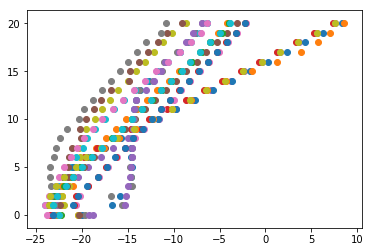

In [22]:
import numpy as np
from scipy import stats
data = pd.read_csv('benchmarkresult2.csv')
for t in ["RANDOM","INVERSE", "ORDERED"]:
    xTime = []
    ySize = []
    fig = None
    for tri in tris:
        temp = data.loc[(data["type"] == t) & (data["tris"] == tri)]
        xTime = np.array(temp['time'])
        ySize = np.array(temp['size'])
        slope, intercept, r_value, p_value, std_err = stats.linregress(xTime,ySize)
        print(slope, intercept, r_value, p_value, std_err)
        line = slope*xTime+intercept
        print(line)
        xTime = np.log2(list(temp['time'].apply(lambda x: x/1000)))
        ySize = np.log2(list(temp['size']))
        plt.scatter(xTime, ySize)
        a = np.cov(xTime, ySize)[0][1]/np.var(xTime)
        b = np.mean(ySize)-a*np.mean(xTime)
        #print("\n\nTris : ", tri, " Type : ", t)
        print("a : ",a)
        print("b : ",b)


In [4]:
1.0468053296222457++22.71304933872115

23.759854668343394

In [32]:
import plotly.plotly as py
import plotly.graph_objs as go

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats

data = pd.read_csv('benchmarkresult2.csv')
for t in ["RANDOM","INVERSE", "ORDERED"]:
    xTime = []
    ySize = []
    fig = None
    data2 = []
    for tri in tris:
        temp = data.loc[(data["type"] == t) & (data["tris"] == tri)]
        xTime = np.log(temp['time'])
        ySize = np.log(temp['size'])
        slope, intercept, r_value, p_value, std_err = stats.linregress(xTime,ySize)
        print(slope, intercept, r_value, p_value, std_err)
        line = slope*xTime+intercept
        print(line)
        trace1 = go.Scatter(
                  x=xTime,
                  y=ySize,
                  mode='markers',
                  name=tri
                  )

        trace2 = go.Scatter(
                          x=xTime,
                          y=line,
                          mode='lines',
                          name=tri
                          )

        data2.append(trace2)
    
    layout = go.Layout(
                        title='Linear Fit : '+t,
                        plot_bgcolor='rgb(229, 229, 229)',
                          xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                          yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)')
                        )

    fig = go.Figure(data=data2, layout=layout)
    fig.show()

1.7591832670131184 10.93078653107364 0.912372084908731 8.368422146958474e-09 0.181079686154927
189    -1.313308
190     2.665857
191     3.721139
192     5.222121
193     5.205200
194     5.329052
195     5.213250
196     5.281382
197     5.403135
198     5.420402
199     5.517309
200     5.659477
201     5.942857
202     6.429762
203     7.627275
204     8.654398
205     9.860296
206    11.711175
207    12.855742
208    13.878023
209    15.276364
Name: time, dtype: float64
1.0091764777612804 10.038440843496952 0.9839021692888222 1.1322751501496396e-15 0.042051569026899875
252     2.751080
253     1.552943
254     1.492328
255     2.337050
256     2.424687
257     2.862090
258     3.445744
259     4.074882
260     4.877179
261     5.593835
262     6.397332
263     7.213973
264     7.983310
265     8.777950
266     9.649392
267    10.453229
268    11.299575
269    12.111802
270    12.764029
271    13.377737
272    14.120761
Name: time, dtype: float64
0.968348287092013 9.866214951983126 

1.8365389930622427 11.08722029504286 0.9145214286991947 6.666662461237371e-09 0.18637523763107747
210    -1.288953
211     3.939006
212     2.346450
213     5.239297
214     5.139416
215     5.063360
216     5.253346
217     5.301517
218     5.284720
219     5.379411
220     5.495603
221     5.636443
222     5.883304
223     6.249170
224     8.164116
225     9.468151
226     9.659997
227    11.478188
228    12.883361
229    13.964521
230    15.020484
Name: time, dtype: float64
1.4108161466534637 14.013870609650091 0.9572155093993123 1.100924301401876e-11 0.09784674916752041
273     3.752950
274     2.318123
275     2.066511
276     2.811172
277     3.148007
278     3.223957
279     4.027347
280     3.868063
281     4.568363
282     4.667447
283     5.627160
284     6.359531
285     7.171164
286     8.072493
287     9.125979
288     9.962489
289    10.947428
290    11.917311
291    12.809724
292    13.817470
293    15.298217
Name: time, dtype: float64
1.0648229477984685 11.6552173988825

1.9204293310625626 11.10329517844033 0.9142485939070929 6.864103600781056e-09 0.1952436968598485
231    -1.253960
232     3.964287
233     4.226525
234     4.437366
235     4.781324
236     4.928621
237     5.004318
238     5.010746
239     5.076702
240     5.112853
241     5.221174
242     5.366229
243     5.632218
244     7.032007
245     8.190450
246     9.288704
247     9.835673
248    11.854224
249    12.925823
250    13.815982
251    15.109642
Name: time, dtype: float64
1.3883016302724753 14.448750442545109 0.9415401168643981 2.0088201671126307e-10 0.11396470215674215
294     4.451889
295     2.485737
296     2.215641
297     3.223761
298     3.356900
299     3.348685
300     3.482128
301     3.813454
302     4.744452
303     4.572997
304     5.226143
305     6.076429
306     6.836412
307     7.894381
308     9.777798
309     9.793725
310    10.745144
311    11.766349
312    12.742466
313    13.709280
314    15.297136
Name: time, dtype: float64
1.0300289099139233 11.6856508563038